<a href="https://colab.research.google.com/github/varshitha775/FMML_LABS_PROJECTS_26/blob/main/mod3_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-4 : Understanding Cross-Validation and Standardization
#### Module Coordinator: Jashn Arora
---

# **Section 1: Tweaking the parameters**

Let's stat the lab by writing knn code on a cancer detection dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
X = cancer.data
y = cancer.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

## Section 1.1: Changing Value of K
Let's try to run the knn with different values of knn and compare the results

In [7]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

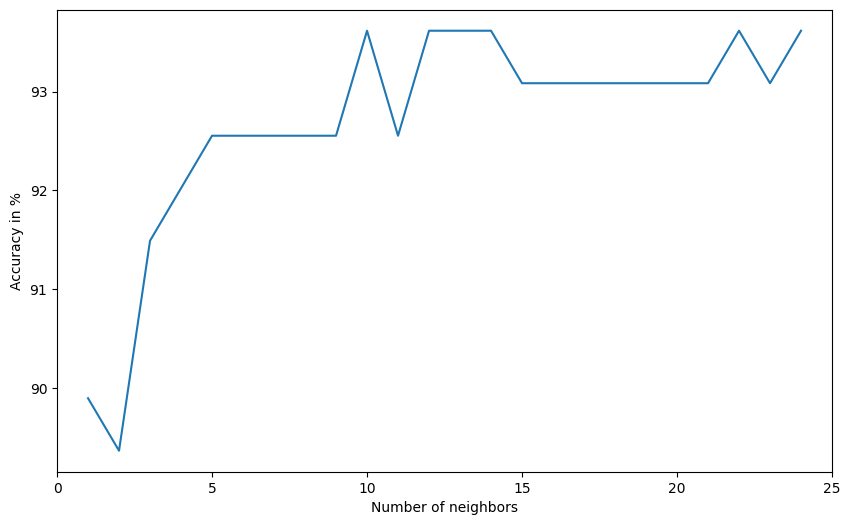

In [8]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [9]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In this case, we see that the ideal number of neighbours can take any one of the values in the list [10,12,13,14,22,24].  
However, this only tells us the effectiveness of the KNN classifier only if we have the same train-test split considered above. It still does not tell us how well the algorithm would perform if the test set were different. The results would have been different if we had split the data differently.

### AUC-ROC Curve

The AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes.  
The diagonal in the curve divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).    
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with the TPR (True Positive Rate) on the y-axis, and the FPR (False Positive Rate) on the x-axis.

In [10]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

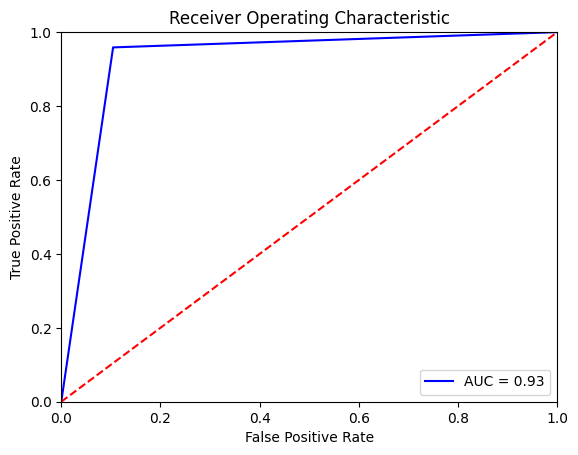

In [11]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

## Section 1.2: KNN using a different train-test split

In [12]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [13]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

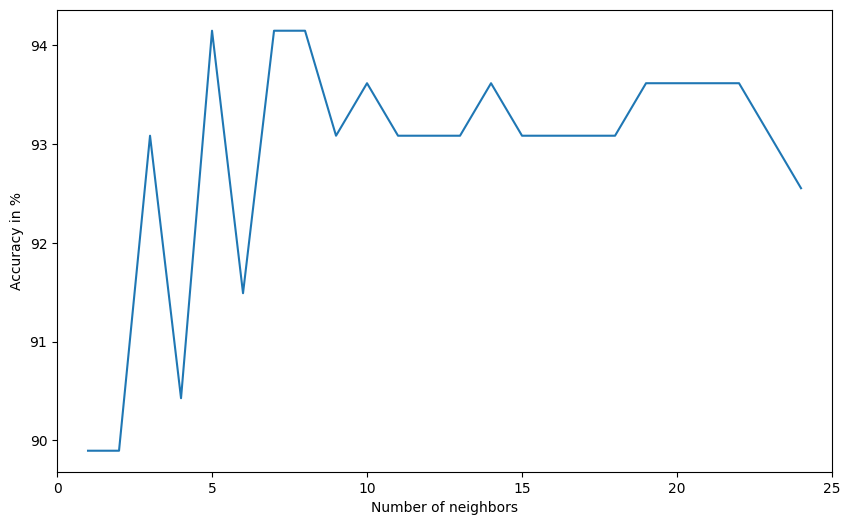

In [14]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [15]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

94.14893617021278
[5, 7, 8]


As you can see, the model gives different results when we split the data differently. Here, it suggests that the ideal k value is 5, 7 or 8.

# **Section 2: Cross Validation**

As you saw in the above two cases with different train-test splits, there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.  

Cross Validation is an important technique in Machine Learning to analyze the performance of a model on **unseen** data.  

There are different kinds of cross-validation methods: exhaustive and non-exhaustive.   
Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.
Non-exhaustive cross validation methods do not compute all ways of splitting the original sample.

One of the most commonly cross-validation methods is **K-Fold Cross validation**. The procedure for K-Fold Cross Validation is as follows:  
1. Split the dataset into k groups (typically without shuffling)
2. For each unique group:  
  a. Take the group as a hold out or test data set  
  b. Take the remaining groups as a training data set  
  c. Fit a model on the training set and evaluate it on the test set  
  d. Retain the evaluation score and discard the model  
3. Summarize the performance of the model using the mean of model evaluation scores over all the folds.

Image source: https://scikit-learn.org/stable/modules/cross_validation.html  
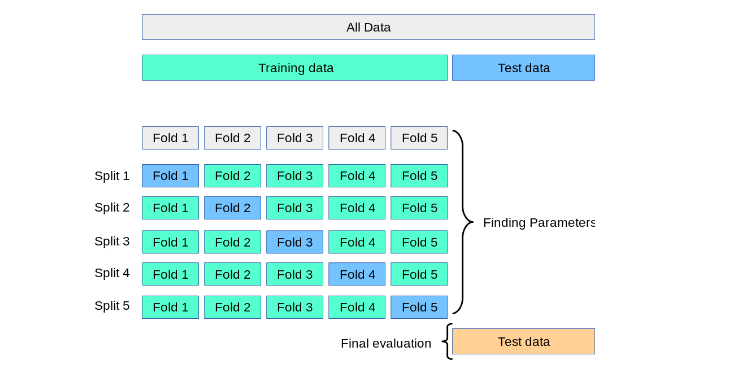

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [17]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

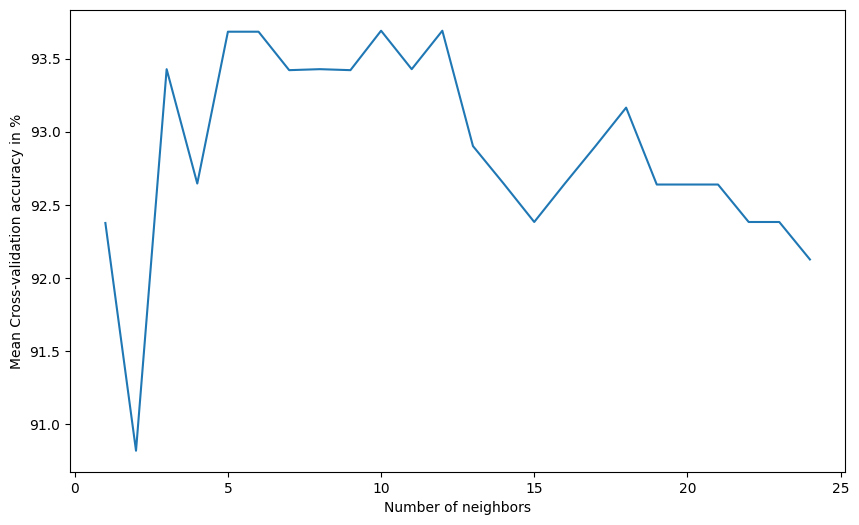

In [18]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [19]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


Note that the accuracy in the above case is not the accuracy on the test set. We plot the mean of the accuracies obtained during cross-validation, when we considered different splits of the training set.  

From the plot above, we can see that when the value of k is 10 or 12, our KNN model generalizes well to unseen data. Performing such cross validation gives us an idea about the parameters to choose when using a machine-learning algorithm.

In [30]:
## TASK-1:
## In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
## Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
## Implement Stratified KFold (refer Sklearn docs) and display the results you obtain
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Initialize StratifiedKFold with 5 splits (folds)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List to store the accuracy for each fold
accuracies = []

# Loop over each fold
for train_index, test_index in kf.split(X, y):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the classifier (Logistic Regression)
    model = LogisticRegression(max_iter=200)

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Display the accuracy for each fold
print(f"Accuracy for each fold: {accuracies}")
print(f"Average accuracy: {np.mean(accuracies):.4f}")


Accuracy for each fold: [1.0, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333]
Average accuracy: 0.9667


# **Section 3: Standardization**


Scaling the data that we have available is a recommended pre-processing step when working with many machine learning algorithms. The scale and distribution of the data drawn from the domain may be different for each variable. Differences in the scales across input variables may increase the difficulty of the problem being modeled, and the model may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.  

Standardization (also called z-score normalization) is one such scaling technique that transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ \text{New (scaled) value} = {X - \mu \over \sigma}$$


In [21]:
X = cancer.data
y = cancer.target

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [24]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

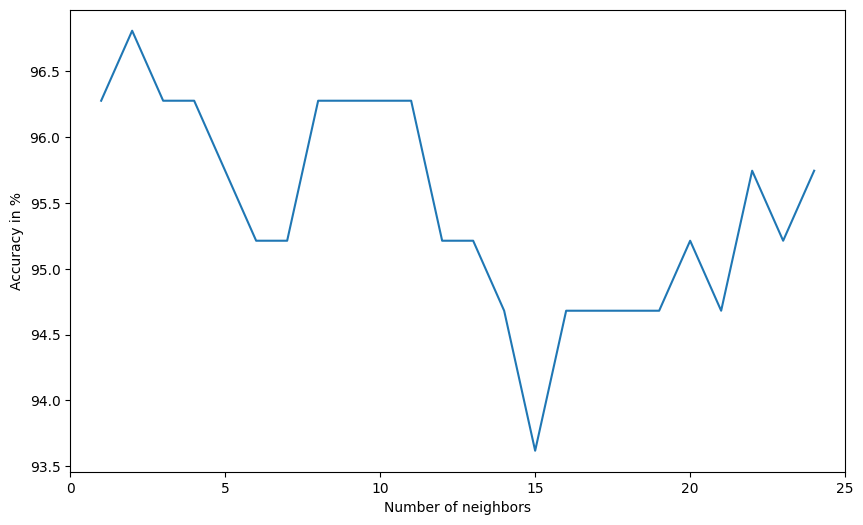

In [25]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [26]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.80851063829788
[2]


Optimal value of k: 6


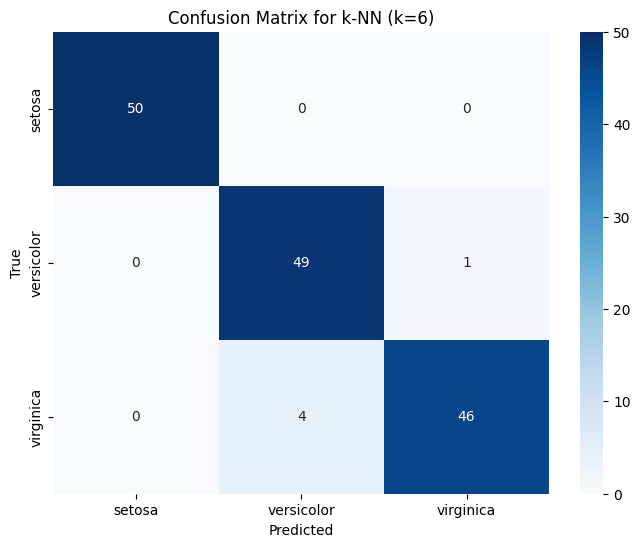

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.98      0.95        50
   virginica       0.98      0.92      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [31]:
## TASK-2:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score values
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Use GridSearchCV to find the optimal value of k for k-NN
param_grid = {'n_neighbors': np.arange(1, 21)}  # Test for k from 1 to 20
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best k from GridSearchCV
optimal_k = grid_search.best_params_['n_neighbors']
print(f"Optimal value of k: {optimal_k}")

# Step 3: Train the k-NN classifier with the optimal k
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_scaled, y)

# Step 4: Generate predictions
y_pred = model.predict(X_scaled)

# Step 5: Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title(f"Confusion Matrix for k-NN (k={optimal_k})")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report (Precision, Recall, F1-score)
report = classification_report(y, y_pred, target_names=data.target_names)
print(report)


In [32]:
## TASK-3:
## Perform K-Fold Cross validation after standardizing the data. Display your results.
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Initialize KFold cross-validation (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store the accuracy for each fold
accuracies = []

# Step 3: Perform K-Fold Cross Validation
for train_index, test_index in kf.split(X_scaled):
    # Split the data into train and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the classifier (Logistic Regression)
    model = LogisticRegression(max_iter=200)

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Step 4: Display the accuracy for each fold and the average accuracy
print(f"Accuracy for each fold: {accuracies}")
print(f"Average accuracy: {np.mean(accuracies):.4f}")


Accuracy for each fold: [1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]
Average accuracy: 0.9600


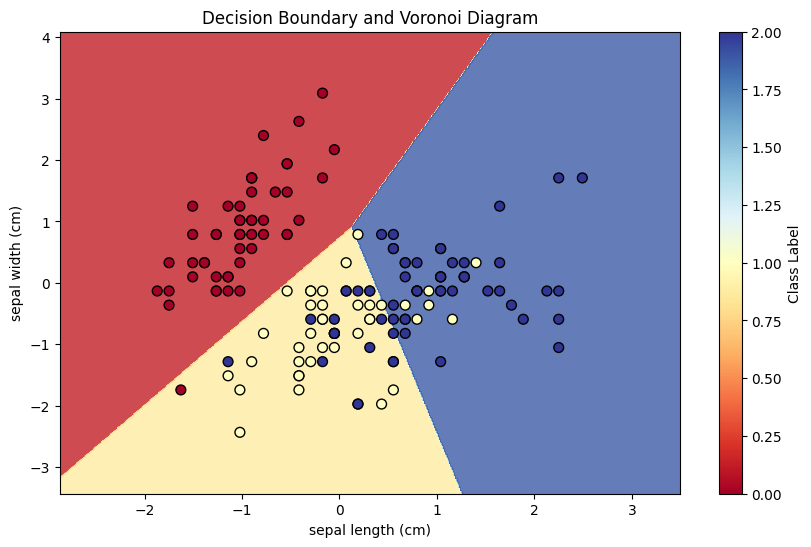

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Step 1: Use only the first two features (for 2D visualization)
X = X[:, :2]

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train the classifier (using logistic regression)
model = LogisticRegression(max_iter=200)
model.fit(X_scaled, y)

# Step 4: Create a mesh grid to plot decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

# Create a mesh grid for the first two features
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict the class labels for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot the decision boundary
plt.figure(figsize=(10, 6))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Scatter plot of the original data (using the first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary and Voronoi Diagram")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.colorbar(label="Class Label")
plt.show()


### Questions to Think About and Answer
1. Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.  
What do you think are the pros/cons of this method ?  
2. Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.

### Pros and Cons of Splitting the Dataset into Train, Validation, and Test Sets

#### **Pros**:

1. **Simplicity**:
   - Splitting the dataset into training, validation, and test sets is straightforward and easy to understand.
   - The process is simple to implement and is commonly used in many machine learning workflows.
   
2. **Clear Evaluation Stages**:
   - With a separate validation set, you can fine-tune your model's hyperparameters without contaminating your test set. The test set is only used for final model evaluation, ensuring an unbiased estimate of model performance.

3. **Less Computationally Expensive**:
   - The approach is computationally cheaper compared to K-fold cross-validation, especially if the dataset is large, as you only train the model once on the training set and evaluate on the validation set.

4. **Realistic Setup**:
   - This approach mirrors the typical machine learning pipeline: training on a training set, tuning on a validation set, and evaluating the final model on a test set.
   - It’s often closer to the way models are evaluated in production, where the model has only one chance to be tested on unseen data.

#### **Cons**:

1. **Dependence on Split Ratios**:
   - The quality of the model’s evaluation heavily depends on the random split of the dataset into train, validation, and test sets. If the split is not representative of the overall population, it may lead to biased results.
   - For small datasets, the choice of split ratio (e.g., 60-20-20 or 70-15-15) can have a big impact on model performance, as each set may not contain enough data to give a reliable estimate of performance.

2. **Limited Data for Training**:
   - Since only part of the data is used for training (especially with a test and validation set), you might not be fully utilizing the available data, which can be especially problematic for small datasets. The model could potentially underperform as it sees less data during training.

3. **Hyperparameter Tuning and Overfitting**:
   - There's a risk of **overfitting** to the validation set during hyperparameter tuning, since the model is evaluated on the validation set repeatedly during tuning. This can lead to poor generalization when the model is applied to the test set, especially if the validation set is small.
   - Unlike K-fold cross-validation, where every data point gets to be in both the training and validation sets multiple times, the train-validation-test split is more prone to bias if the validation or test set is not representative.

4. **Inefficiency with Small Datasets**:
   - In small datasets, this method can be inefficient because you are holding out a portion of the data for validation and testing, which could have been used to train the model. As a result, the model might not perform well due to insufficient training data.

---

### K-Fold Cross-Validation: Exhaustive or Non-Exhaustive?

**K-Fold Cross-Validation is a Non-Exhaustive Method**.

#### **Justification**:

- **Exhaustive Methods**: An exhaustive cross-validation method would mean that every possible combination of train and test splits is considered. For example, in leave-one-out cross-validation (LOO), each sample in the dataset is used as a test set once, and the model is trained on all remaining data points. This is exhaustive because each possible subset of data is used as a test set exactly once.
  
- **Non-Exhaustive Methods**: In K-fold cross-validation, the dataset is divided into `K` subsets, or "folds." In each iteration, one fold is used as the test set, and the remaining `K-1` folds are used for training. The process is repeated `K` times, each time with a different fold serving as the test set. After that, the results are averaged to give an overall performance estimate.

  - Since K-fold cross-validation only rotates through the `K` subsets, it does **not** consider all possible combinations of train-test splits. Thus, it is non-exhaustive. The total number of evaluations is limited by the number of folds (typically 5 or 10), whereas an exhaustive method would evaluate the model on all possible splits.

  - In general, K-fold cross-validation aims to provide a good estimate of model performance without the computational burden of an exhaustive search. By using multiple train-test splits, it reduces variance in the performance estimate, while still being less computationally demanding than exhaustive methods.

---

### Comparison Summary:

| **Method**                   | **Pros**                                      | **Cons**                                      | **Exhaustiveness** |
|------------------------------|-----------------------------------------------|-----------------------------------------------|--------------------|
| **Train, Validation, and Test Split** | Simple, intuitive, good for large datasets, final evaluation on test set | May introduce bias based on how data is split, not enough data for small datasets, prone to overfitting | Non-Exhaustive |
| **K-Fold Cross-Validation**   | More robust estimate, reduces bias, uses all data for training | Computationally expensive, especially with many folds, validation set is not held out consistently | Non-Exhaustive |

### Useful Resources for further reading
1. Cross validation (scikit-learn): https://scikit-learn.org/stable/modules/cross_validation.html  
2. Wikipedia: https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
3. Standardization: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/  
4. AUC-ROC : https://en.wikipedia.org/wiki/Receiver_operating_characteristic
